In [5]:
import pandas as pd
df = pd.read_excel('WEOApr2025.xlsx.xlsx', engine='openpyxl')



In [58]:
import pandas as pd
import numpy as np

#Cargar base
df = pd.read_excel("WEOApr2025.xlsx.xlsx", engine="openpyxl")

#Valores faltantes representados como texto
missing_vals = ["..", "--", "—", "n/a", "N/A"]

#Reemplazar esos valores por np.nan
df.replace(missing_vals, np.nan, inplace=True)

#Verificar cuántos valores faltantes hay por columna antes de filtrar
print(" Valores faltantes por columna (global):")
print(df.isnull().sum().sort_values(ascending=False).head(10))

#Filtrar Argentina
arg_df = df[df["Country"] == "Argentina"].copy()

#Detectar columnas con años como nombre
year_columns = [col for col in arg_df.columns if str(col).isdigit()]

# Convertir columnas numéricas (años) a float
for col in year_columns:
    arg_df[col] = pd.to_numeric(arg_df[col], errors="coerce")

#Verificar valores faltantes solo en Argentina
print("\n Valores faltantes por columna (Argentina):")
missing_arg = arg_df[year_columns].isnull().sum()
print(missing_arg[missing_arg > 0])

#Cuántas filas tienen al menos 1 NaN
print("\n Cantidad de filas con al menos un NaN:", arg_df[year_columns].isnull().any(axis=1).sum())

#Porcentaje de NaNs por fila (para decidir si eliminar algunas observaciones)
arg_df["missing_percent"] = arg_df[year_columns].isnull().mean(axis=1) * 100
print("\n Promedio de % de valores faltantes por fila:", round(arg_df["missing_percent"].mean(), 2))

#Mostrar algunas filas con muchos NaNs
print("\n Ejemplos de observaciones con muchos NaNs:")
print(arg_df[arg_df["missing_percent"] > 50][["WEO Subject Code", "Subject Descriptor", "missing_percent"]].head())

#Eliminar observaciones con +50% de valores faltantes
arg_df_clean = arg_df[arg_df["missing_percent"] < 50].copy()


 Valores faltantes por columna (global):
1980    4829
1981    4688
1982    4640
1983    4596
1984    4566
1985    4485
1986    4431
1987    4408
1988    4316
1989    4255
dtype: int64

 Valores faltantes por columna (Argentina):
1980    29
1981    29
1982    28
1983    28
1984    26
1985    25
1986    25
1987    25
1988    25
1989    24
1990    25
1991    25
1992    23
1993    13
1994    13
1995    13
1996    13
1997    11
1998     9
1999     9
2000     9
2001     9
2002     9
2003     9
2004     9
2005     9
2006     9
2007     9
2008    11
2009    11
2010    11
2011    11
2012    12
2013    14
2014    16
2015    19
2016    17
2017    16
2018    16
2019    16
2020    19
2021    20
2022    21
2023    21
2024    21
2025    21
2026    21
2027    21
2028    21
2029    21
2030    21
dtype: int64

 Cantidad de filas con al menos un NaN: 30

 Promedio de % de valores faltantes por fila: 39.57

 Ejemplos de observaciones con muchos NaNs:
    WEO Subject Code                                 Su

In [40]:
#Filtros para Argentina
argentina_data = df[df["Country"] == "Argentina"]

#Mostrar todas las variables disponibles para Argentina
variables = argentina_data[["WEO Subject Code", "Subject Descriptor"]].drop_duplicates()
variables.head(10)


,WEO Subject Code,Subject Descriptor
264,NGDP_R,"Gross domestic product, constant prices"
265,NGDP_RPCH,"Gross domestic product, constant prices"
266,NGDP,"Gross domestic product, current prices"
267,NGDPD,"Gross domestic product, current prices"
268,PPPGDP,"Gross domestic product, current prices"
269,NGDP_D,"Gross domestic product, deflator"
270,NGDPRPC,"Gross domestic product per capita, constant pr..."
271,NGDPRPPPPC,"Gross domestic product per capita, constant pr..."
272,NGDPPC,"Gross domestic product per capita, current prices"
273,NGDPDPC,"Gross domestic product per capita, current prices"


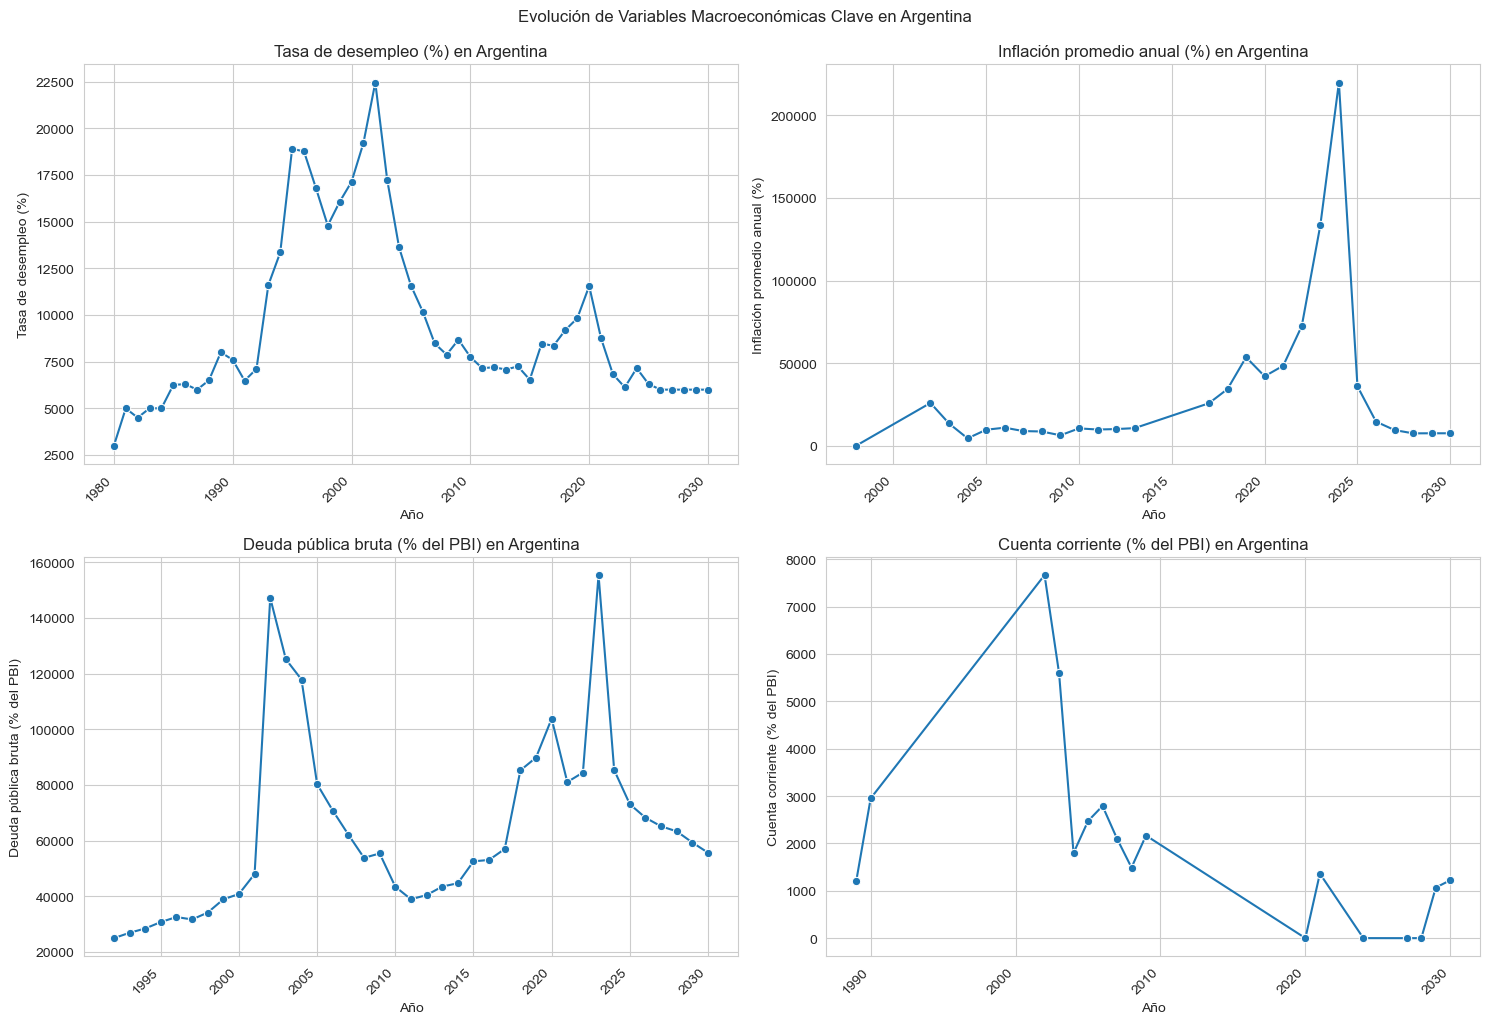

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Cargar base
df = pd.read_excel("WEOApr2025.xlsx.xlsx", engine="openpyxl")

#Valores faltantes representados como texto
missing_vals = ["..", "--", "—", "n/a", "N/A"]

#Reemplazar esos valores por np.nan
df.replace(missing_vals, np.nan, inplace=True)

#Filtrar Argentina
arg_df = df[df["Country"] == "Argentina"].copy()

#Detectar columnas con años como nombre
year_columns = [col for col in arg_df.columns if str(col).isdigit()]

#Convertir columnas numéricas (años) a float
for col in year_columns:
    arg_df[col] = pd.to_numeric(arg_df[col], errors="coerce")

#Variables de interés (reemplazando NGDPDPC con LUR)
variables_interes = ["LUR", "PCPIPCH", "GGXWDG_NGDP", "BCA_NGDPD"]
descripcion_variables = {
    "LUR": "Tasa de desempleo (%)",
    "PCPIPCH": "Inflación promedio anual (%)",
    "GGXWDG_NGDP": "Deuda pública bruta (% del PBI)",
    "BCA_NGDPD": "Cuenta corriente (% del PBI)",
}

#Filtrar el DataFrame para las variables de interés
arg_df_interes = arg_df[arg_df["WEO Subject Code"].isin(variables_interes)].copy()

#Seleccionar las columnas relevantes (código de la variable, descripción y años disponibles)
columnas_mostrar = ["WEO Subject Code", "Subject Descriptor"] + year_columns
arg_data_historica = arg_df_interes[columnas_mostrar].copy()

#Fusionar con la descripción de las variables
arg_data_historica = pd.merge(arg_data_historica, pd.DataFrame(descripcion_variables.items(), columns=["WEO Subject Code", "Descripcion"]), on="WEO Subject Code", how="left")

# Reorganizar las columnas para una mejor visualización
columnas_ordenadas = ["Descripcion"] + ["WEO Subject Code"] + ["Subject Descriptor"] + year_columns
arg_data_historica_preliminar = arg_data_historica[columnas_ordenadas].copy()

# --- Sección de Limpieza de Datos Numéricos ---
arg_data_historica_clean = arg_data_historica_preliminar.copy()
for codigo_variable in variables_interes:
    filas_variable = arg_data_historica_clean[arg_data_historica_clean["WEO Subject Code"] == codigo_variable].index
    for columna_anio in year_columns:
        # Convertir explícitamente a numérico (por si acaso)
        arg_data_historica_clean.loc[filas_variable, columna_anio] = pd.to_numeric(arg_data_historica_clean.loc[filas_variable, columna_anio], errors='coerce')
        # Filtrar valores no positivos (la tasa de desempleo no debería ser negativa, pero por consistencia)
        arg_data_historica_clean.loc[filas_variable, columna_anio] = np.where(arg_data_historica_clean.loc[filas_variable, columna_anio] <= 0, np.nan, arg_data_historica_clean.loc[filas_variable, columna_anio])

#Eliminar filas donde todas las columnas de los años son NaN para una variable específica
arg_data_historica_clean = arg_data_historica_clean.dropna(subset=year_columns, how='all')

# --- Sección de Graficación ---
if not arg_data_historica_clean.empty:
    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")

    for i, codigo_variable in enumerate(variables_interes):
        data_variable = arg_data_historica_clean[arg_data_historica_clean["WEO Subject Code"] == codigo_variable].copy()
        if not data_variable.empty:
            descripcion = descripcion_variables[codigo_variable]
            datos_grafico = data_variable[year_columns].T
            datos_grafico.columns = ["Valor"]
            datos_grafico.index.name = "Año"
            datos_grafico = datos_grafico.reset_index()

            plt.subplot(2, 2, i + 1)
            sns.lineplot(x="Año", y="Valor", data=datos_grafico, marker="o")
            plt.title(f"{descripcion} en Argentina")
            plt.xlabel("Año")
            plt.ylabel(descripcion)
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
        else:
            print(f"⚠️ No hay datos válidos para graficar '{descripcion}'.")

    plt.suptitle("Evolución de Variables Macroeconómicas Clave en Argentina", y=1.02)
    plt.show()
else:
    print("⚠️ No hay datos válidos para graficar después de la limpieza.")

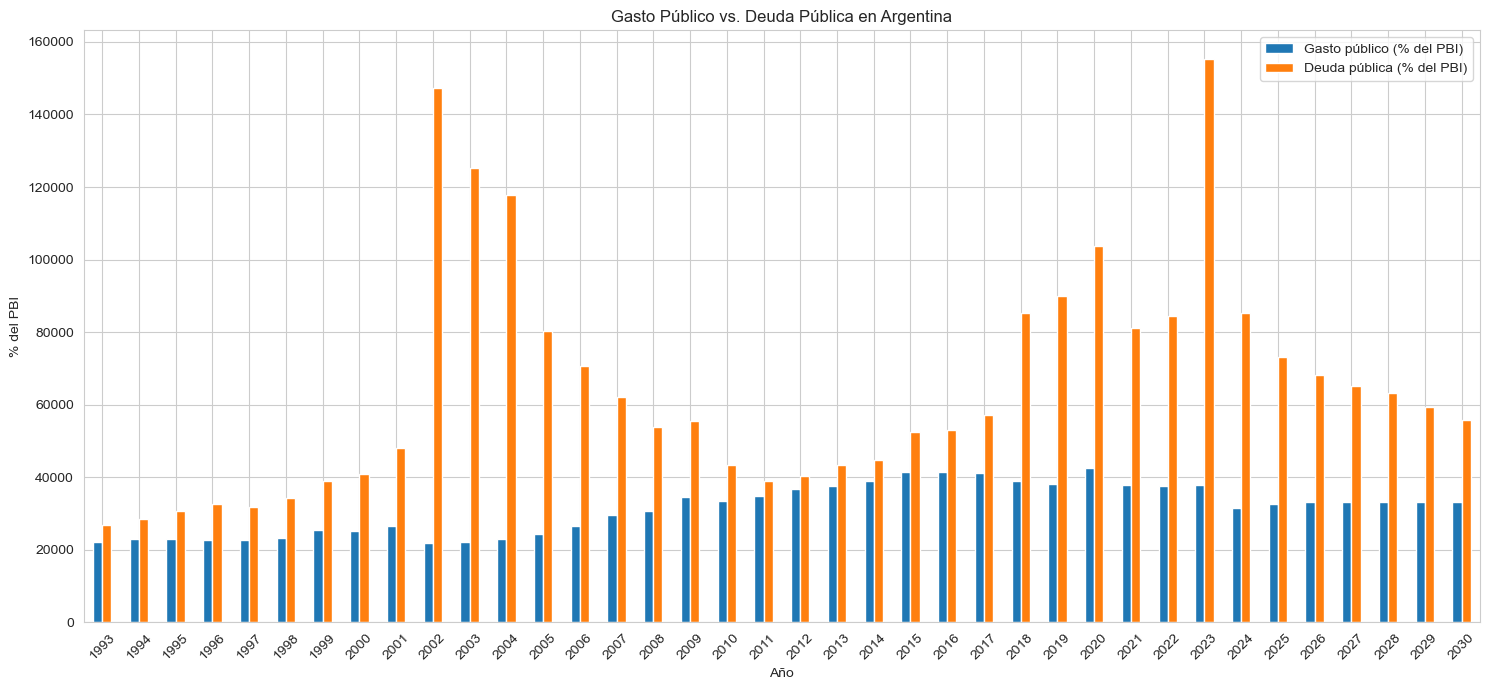

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Cargar base
df = pd.read_excel("WEOApr2025.xlsx.xlsx", engine="openpyxl")

#Reemplazar valores faltantes por NaN
missing_vals = ["..", "--", "—", "n/a", "N/A"]
df.replace(missing_vals, np.nan, inplace=True)

#Filtrar datos de Argentina
arg_df = df[df["Country"] == "Argentina"].copy()

#Años disponibles
year_columns = [col for col in arg_df.columns if str(col).isdigit()]

#Convertir columnas a numéricas
for col in year_columns:
    arg_df[col] = pd.to_numeric(arg_df[col], errors="coerce")

#Filtrar variables: Gasto público y Deuda pública
gasto = arg_df[arg_df["WEO Subject Code"] == "GGX_NGDP"]
deuda = arg_df[arg_df["WEO Subject Code"] == "GGXWDG_NGDP"]

#Crear DataFrame de comparación
comparacion = pd.DataFrame({
    "Año": year_columns,
    "Gasto público (% del PBI)": gasto[year_columns].values.flatten(),
    "Deuda pública (% del PBI)": deuda[year_columns].values.flatten()
}).dropna()

#Configurar gráfico
comparacion.set_index("Año", inplace=True)
comparacion.plot(kind="bar", figsize=(15, 7), title="Gasto Público vs. Deuda Pública en Argentina")
plt.ylabel("% del PBI")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
